<a href="https://colab.research.google.com/github/varshitfauzdar/Titanic_Survival_Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data collection and **Processing**

In [42]:
#load the data from csv file to Pandas dataFrame
titanic_data = pd.read_csv('/content/train.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [43]:
titanic_data.shape

(891, 12)

In [44]:
#getting some info about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
#getting number of missing value in each column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Handling the missing value

In [46]:
#drop the cabin column from the dataFrame
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [97]:
# replace all missing value in AGE column with mean value
titanic_data['Age'] = pd.to_numeric(titanic_data['Age'])
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)

/tmp/ipython-input-2510200334.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)


In [84]:
# replace all missing value in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-1709552782.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [98]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Data Analysis

In [50]:
#getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [51]:
# find the number of people survived and not survived
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


# Data Visualisation

In [52]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

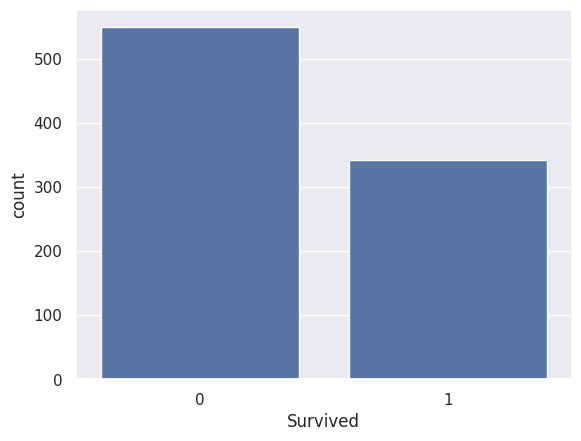

In [56]:
#making a count plot for survived column
sns.countplot(x='Survived', data = titanic_data)

,count
Sex,
male,577
female,314


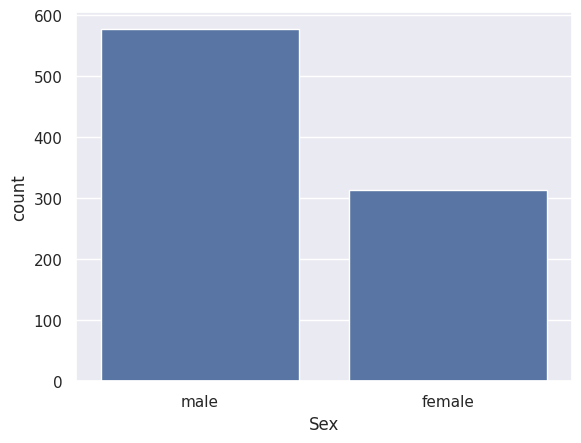

In [58]:
#making a count plot for sex column
sns.countplot(x='Sex', data = titanic_data)
titanic_data['Sex'].value_counts()

Survived,0,1
Sex,,
female,81,233
male,468,109


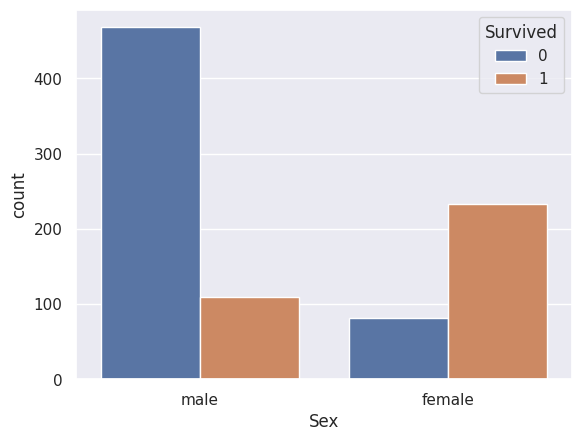

In [67]:
# number of survivors based on genders
sns.countplot(x='Sex', hue='Survived', data = titanic_data)
titanic_data.groupby(['Sex', 'Survived']).size().unstack()

<Axes: xlabel='Pclass', ylabel='count'>

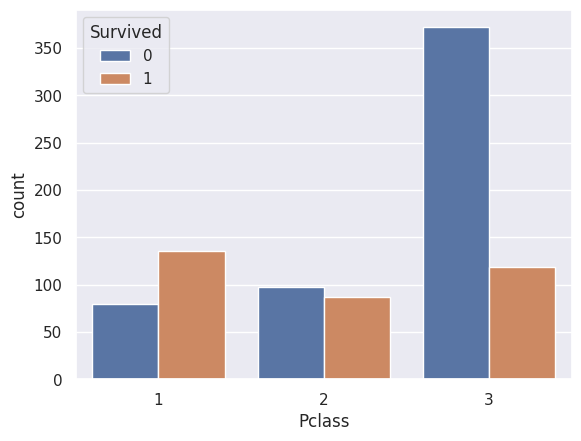

In [66]:
# number of "Pclass" based on genders
sns.countplot(x= 'Pclass',hue = "Survived", data = titanic_data)

# Encoding the Categorical Columns

In [69]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [71]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [73]:
#convering Categorical Columns
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

/tmp/ipython-input-2435787751.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [74]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


# Seprating Features and Target

In [91]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived', 'Age'],axis=1)
Y = titanic_data['Survived']
print(X.head())
print(Y.head())

   Pclass  Sex  SibSp  Parch     Fare  Embarked
0       3    0      1      0   7.2500       0.0
1       1    1      1      0  71.2833       1.0
2       3    1      0      0   7.9250       0.0
3       1    1      1      0  53.1000       0.0
4       3    0      0      0   8.0500       0.0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


# Train Test ***Split***

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=52)
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


***# MODEL TRAINING***  -> Logistic Regression


In [80]:
model = LogisticRegression()

In [99]:
# training the logistic Regression model with training data
model.fit(X_train, Y_train)


LogisticRegression()

In [101]:
#accuracy on Training Data
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0
 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1
 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1
 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1
 1 0 0 0 0 1 0 0 1 0 1 0 

In [104]:
# accuracy on train data
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy of Training data : ",training_data_accuracy)

Accuracy of Training data :  0.800561797752809


In [106]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0]


In [108]:
# accuracy on test data
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7988826815642458
